# Data Analyst Nanodegree Project 1
## Test a Perceptual Phenomenon

## Background

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

First let's get the data of the Stroop experiment ready to perform necessary analysis.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# path to data
path = r'C:\Users\105056796\Box Sync\Udacity\Data Science\Projects\Project 1 - Stroop Effect/stroopdata.csv'
# raw data set
dataFrame = pd.read_csv(path)

# show complete data frame
dataFrame

,Congruent (C),Incongruent (IC)
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


## Question 1: Identify variables in the experiment

__Operational Definition__:
Time (in seconds) needed to go through a list of words and say out loud the color of the ink in which each word is printed.

__Independent Variable:__
The color used to print the name of a color.

__Dependent Variable:__
Time to name the color provided by the printed word, not the printed color.


## Question 2: Establish a hypothesis and statistical test
Let's start off with establishing the hypotheses. Once that is done we choose an appropriate statistical method to test the hypotheses.

###Hypotheses

#####Null Hypothesis (H0)
The results (based on the operational definition) of the experiment with the __Incongruent Word Condition (IWC)__ are not significantly different from the results of the experiment with the __Congruent Word Condition (CWC)__.

H<sub>0</sub>: &mu;<sub>C</sub> = &mu;<sub>IC</sub>

where &mu;<sub>C</sub> represents the population mean respective to the _CWC_ results and &mu;<sub>IC</sub> the population mean of the _IWC_ results.

#####Alternative Hypothesis (HA)
The results of the experiment with the _IWC_ are significantly different from the results of the experiment with the _CWC_.

H<sub>A</sub>: &mu;<sub>C</sub> &ne; &mu;<sub>IC</sub>

###Statistical Test
Given the circumstances, a __dependent t-test for paired samples__ is chosen to test the hypothesis. 

Reasons for picking the t-test are 
__(1)__ that the sample size is 24, which is less than 30,
__(2)__ that the polulation standard deviation is not known, 
__(3)__ that a normal distribution is assumed,
__(4)__ that the samples are dependent as the same subject takes the test twice (once with the _CWC_ and once with the _IWC_) and 
__(5)__ that there is paired sample data avaialable from the experiments.


## Question 3: Report descriptive statistics

In [2]:
# Descriptive Statistics Analysis on the data
dataFrame.describe()

,Congruent (C),Incongruent (IC)
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Note: After proofing the values provided by the describe() function used above, I can confirm that __Bessel's Correction__ has been applied to calculate the standard deviations of the two (paired) samples.

In [57]:
# Median of the Congurnet and Incongruent Data
dataFrame.median()

Congruent (C)       14.3565
Incongruent (IC)    21.0175
dtype: float64

#### Congruent Data

In [71]:
# Range of the Congruent Data
rangeCongruent = dataFrame['Congruent (C)'].max() - dataFrame['Congruent (C)'].min()
rangeCongruent

13.698000000000002

In [72]:
# Inter Quantile Range of the Congruent Data
iqrCongruent = dataFrame['Congruent (C)'].quantile(.75)- dataFrame['Congruent (C)'].quantile(.25)
iqrCongruent

4.3054999999999986

#### Incongruent Data

In [76]:
# Range of the Incongruent Data
rangeIncongruent = dataFrame['Incongruent (IC)'].max() - dataFrame['Incongruent (IC)'].min()
rangeIncongruent

19.568

In [77]:
# Inter Quantile Range of the Incongruent Data
iqrIncongruent = dataFrame['Incongruent (IC)'].quantile(.75)- dataFrame['Incongruent (IC)'].quantile(.25)
iqrIncongruent

5.3347499999999997

## Question 4: Plot the data

### Histogram
Let's take a look at the histograms of the Congruent and the Incongruent data.

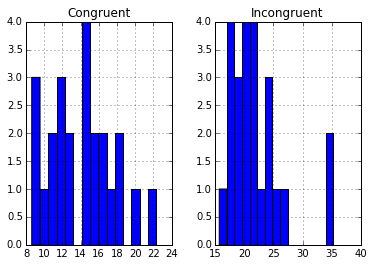

In [42]:
# Create Histogram of Experiment Data
dataFrame_hist = dataFrame.hist(bins=15)

Taking a look a the histogram of the two dataset, one can immediatly recognize that the values for _IWC_ results are much higher than for the _CWC_ results. Even though, one can also see that there are overlaps in the values.

### Boxplot
Now, let's take a look at the boxplot of the data.

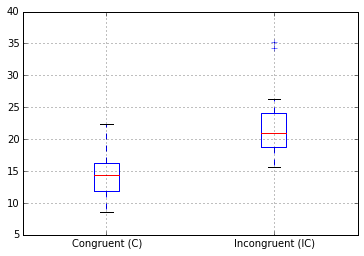

In [126]:
# Create Boxplot of Experiment Data
dataFrame_boxplot = dataFrame.boxplot(return_type='axes')

The box plot of the sample data of _CWC_ and _IWC_ indicated already that there is a difference between two value sets. Acoording to that the results for _IWC_ are higher than results of to the _CWC_. For example, if we take a look at the __Inter Quantile Range__ of both result sets, there is not even an overlap of the ranges. Also the Medians - robust against outliers - of the two data sets are quite different.

## Question 5: Perform the statistical test and interpret your results

As stated above, to investigate if there is a significant difference between the _CWC_ results and the _IWC_ results a __dependent t-test for paired samples__ is beeing applied.

##### Hypotheses

The following hyptheses have been established:

H<sub>0</sub>: &mu;<sub>C</sub> = &mu;<sub>IC</sub>

H<sub>A</sub>: &mu;<sub>C</sub>  &ne; &mu;<sub>IC</sub>

With respect to H<sub>0</sub> - as we wanna accept or reject H<sub>0</sub> - a two-tailed hypothesis test will be performed.

#####  Data

This test requires to calculated the __difference__ of sample pairs. The calculation of that value has been done outside __jupyter__ and stored in a separate file. Let's take a look at that file first.

In [107]:
# path to data for test
path1 = r'C:\Users\105056796\Box Sync\Udacity\Data Science\Files/stroopdata_inclDiff.csv'
# data for test including the difference of CWC and IWC pairs and the squared deviations
dataFrame_complete = pd.read_csv(path1)

# show complete data frame
dataFrame_complete

,Congruent (C),Incongruent (IC),Difference D (C-IC)
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


For performing the hypothesis test some values need to be calculed. Therefore, in the next sections the __Standard Deviation__ of Differences, the __Mean__ of Differences and the __Standard Error__ of the differences are getting calculated.

##### Standard Deviation of Differences

Now let's calculated the __Standard Deviation__ of the __Differences__ between the sample pairs. Please note that __Bessel' Correction__ is getting applied.

In [105]:
# Standard Deviation of Differences between Sample Pairs
sample_stddev_d = dataFrame_complete['Difference D (C-IC)'].std()
sample_stddev_d

4.864826910359054

In [109]:
# Mean of Differences
sample_mean_d = dataFrame_complete['Difference D (C-IC)'].mean()
sample_mean_d

-7.964791666666667

In [111]:
# Mean of Differences
sample_stdError_d = sample_stddev_d / (math.sqrt(dataFrame_complete['Difference D (C-IC)'].count()))
sample_stdError_d

0.9930286347783402

##### &alpha;-Level, Confidence Interval and t-critical Values

To perform the hypothesis test an __&alpha;-Level__ of 0.05 is used. That means that the __Confidence Level (CL)__ is 95 %. The corresponding __Conficende Interval (CI)__ can be calculated using the values of the __t-table__ considering the __Degree of Freedom (dF)__ - calculated as _dF = n-1_, where _n_ is the sample size - as well as _CL_.

For a 95 % _CL_ the __t-critical values__ are __&plusmn;2.069__.

Knowing that, the values for _CI_ can be calulated. For calculating the _CI_ values the __Mean__, the __Standard Error__ and the __t-critical value__ will be used:

In [112]:
# define t-critical value
t_crit = 2.069

In [117]:
# Lower Boundary
low_CI_boundary = sample_mean_d - (sample_stdError_d * t_crit)
low_CI_boundary

-10.01440276884916

In [116]:
# Upper Boundary
upp_CI_boundary = sample_mean_d + (sample_stdError_d * t_crit)
upp_CI_boundary

-5.915180564484173

##### t-Score

Now the __t-score__ is getting calculated. To do that we first calculated the __Point Estimate (PE)__. _PE_ is the difference between means of _IWC_ and _CWC_.

In [123]:
# Point Estimate
point_est = dataFrame['Congruent (C)'].mean() - dataFrame['Incongruent (IC)'].mean()
point_est

-7.964791666666665

In [125]:
# t-Score
t_score = point_est/sample_stdError_d
t_score

-8.020706944109959

##### Result
The _t-Score_ calculated for the paired samples is way outside the range of _t-critical values_ and therefore we __reject H<sub>0</sub>__. 

In fact, that result means that it took the subjects of the experiment significantly less time to complete the experiment with the _CWC_. Therefore we can argue that _human beeings can say out loud the color of the ink in which a word is printed significantly faster if the word and the ink used are congruent_.

After taking the experiment myself, that is the result that I personally expected.

## Question 6: Digging deeper and extending the investigation
According to the literatuer about _Stroop Effect_ the processing of the human brain and hence the reaction time of the task gets affected by way how the words are displayed. Means if the word which describes a color is written in that same colored ink, than it is easier for the brain to process that information compared to the situation where the word which describes a color is written in a different colored ink.

Appart from that original experiment to show and proof the _Stroop Effect_ other variations of the test were investigated as well. One concrete example is the __Numerical Stroop Effect Test__. In that test subjects need to identify the higher numerical value. In the congruent trails the higher numerical value is written in a bigger physical size. In the incongruent trails the smaller numerical value is written in a bigger size. It was found that subjects reaction time to identify the higher numerical value in the case of incongruent pairs is slower.